In [1]:
import numpy as np

class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        cov = np.cov(X.T)

        eigenvectors, eigenvalues = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


/tmp/ipykernel_3980/2800940665.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


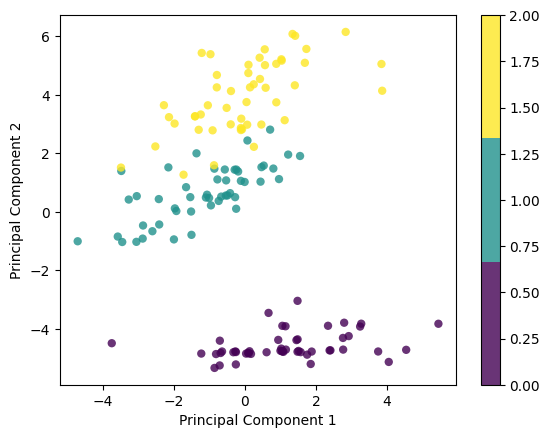

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X = data.data
y = data.target

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()